In [2]:
from tools.functions import *  


/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [689]:
def percent_overlap(pattern1, pattern2):
    return np.sum(pattern1*pattern2)/len(pattern1) 

0.3
[[0.   0.   0.   0.   0.  ]
 [1.8  0.   0.   0.   0.  ]
 [1.5  1.3  0.   0.   0.  ]
 [1.3  1.2  1.1  0.   0.  ]
 [0.9  0.9  0.75 0.75 0.  ]]


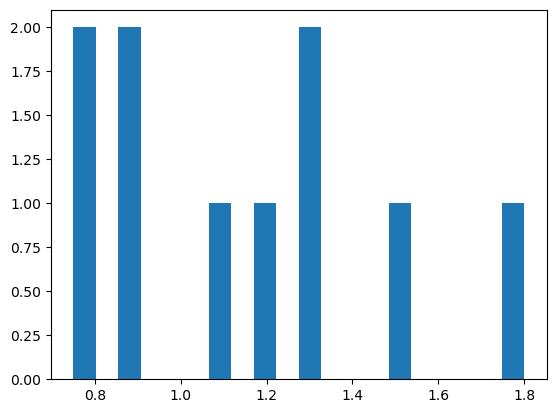

In [963]:

## Weird way to find seed patterns that have a more or less uniform overlap matrix. Works only for 5 patterns now.

i = 0
matched = False
m = []
while i < 100000 and matched == False:

    p1 = generate_pattern(200, 0.2)
    p2 = generate_overlapping_pattern(p1, 0.9)
    p3 = generate_overlapping_pattern(p1, 0.75)
    p4 = generate_overlapping_pattern(p1, 0.65)
    p5 = generate_overlapping_pattern(p1, 0.45)

    percent_match = np.zeros((5, 5))
    percent_match[1, 0] = percent_overlap(p2, p1)
    percent_match[2, 0] = percent_overlap(p3, p1)
    percent_match[3, 0] = percent_overlap(p4, p1)
    percent_match[4, 0] = percent_overlap(p5, p1)
    percent_match[2, 1] = percent_overlap(p3, p2)
    percent_match[3, 1] = percent_overlap(p4, p2)
    percent_match[4, 1] = percent_overlap(p5, p2)
    percent_match[3, 2] = percent_overlap(p4, p3)
    percent_match[4, 2] = percent_overlap(p5, p3)
    percent_match[4, 3] = percent_overlap(p5, p4)

    m.append(percent_match[4, 3])
    if percent_match[4, 3] == 0.3 and len(unique(percent_match.flatten())) == 9 :
        matched = True
        print("Matched")
    i += 1

print(min(m))
print(percent_match)
plt.hist(percent_match.flatten()[percent_match.flatten() > 0], bins=20)
plt.show()

prototypes = np.array([p1, p2, p3, p4, p5])

In [787]:
def generate_prototype_variations(prototypes, n_sub, percent_variation):
    '''function to generate variations of prototypes with a certain percentage of flipped bits. Is used to generate the finnegan data'''
    n_prototypes, length = prototypes.shape
    variations = np.zeros((n_prototypes*(n_sub), length))
    original_prototypes = []
    for i in range(n_prototypes):
        for j in range(n_sub):
            variations[i*n_sub+j] = np.abs(prototypes[i] - generate_pattern(length, percent_variation))
            original_prototypes.append(i*10+j)
    return variations, original_prototypes

In [945]:
def shufle_percent(original, percent_variation):
    # git indices of active bits
    active_bits = np.where(original == 1)[0]
    inactice_bits = np.where(original == 0)[0]
    # number of bits to flip
    n_flip = int(len(active_bits) * percent_variation)
    # get random indices to flip
    flip_indices = np.random.choice(active_bits, n_flip, replace=False)
    flip_inactive_indices = np.random.choice(inactice_bits, n_flip, replace=False)
    # flip bits
    new_pattern = np.copy(original)
    new_pattern[flip_indices] = 0
    new_pattern[flip_inactive_indices] = 1
    return new_pattern
    
    


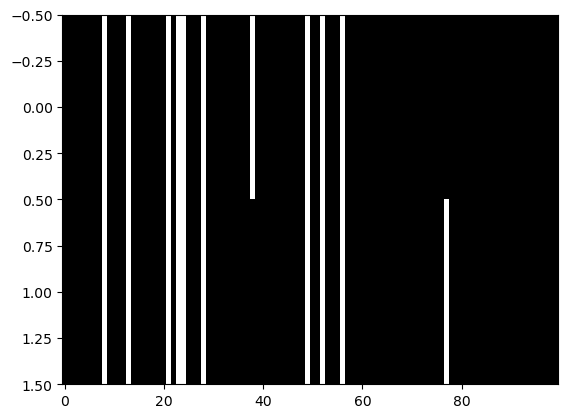

In [958]:
imshow(np.row_stack((p1, shufle_percent(p1, 0.1))), aspect='auto', cmap='gray', interpolation='none')

In [864]:
prototypes = generate_prototypes(5, 0.1, 200)
prototype_variations = generate_prototype_variations(prototypes, 10, 0.1)
final_variations = generate_final_variations(prototype_variations, 10, 0.05)

TypeError: Invalid shape (50, 10, 100) for image data

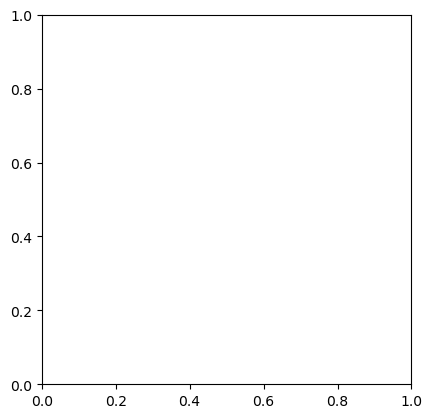

In [866]:
plt.imshow(final_variations[0])

In [753]:
prototypes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [291]:
#### DATA GENERATION ####
# 1. Generate seed patterns

len_pattern = 1000
n_seed_patterns = 5
percent_active = 0.1
max_overlap = 0.9
min_overlap = 0.1

distances = np.array(np.round(np.linspace((len_pattern+1)*2*percent_active * min_overlap, (len_pattern+1)*2*percent_active * max_overlap, n_seed_patterns*n_seed_patterns), 2)).reshape(n_seed_patterns, n_seed_patterns)


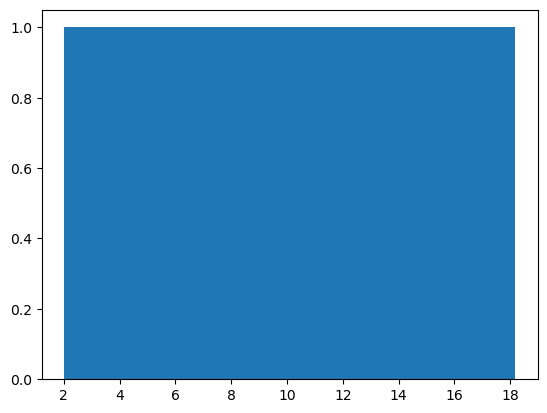

In [212]:
hist(distances.flatten(), bins = 25)
plt.show()

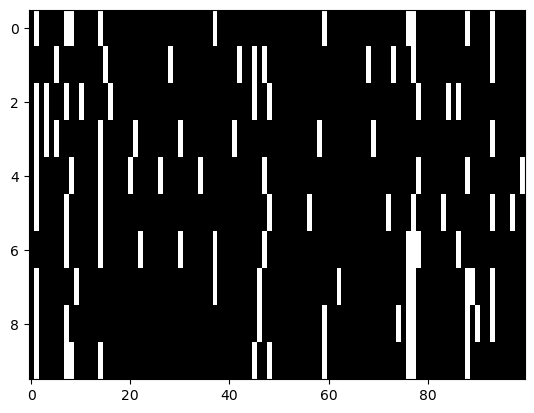

In [77]:

imshow(seed_patterns, aspect="auto", cmap="gray")

In [544]:
overlap = np.round(np.linspace(min_overlap, max_overlap, int((n_seed_patterns*n_seed_patterns-5)/2)), 2)
overlap_matrix = np.zeros((n_seed_patterns, n_seed_patterns))
overlap = -np.sort(-overlap)

count = 0
for i in range(n_seed_patterns):
    for j in range(n_seed_patterns):
        if i == j:
            overlap_matrix[i,j] = 1
        elif i < j:
            overlap_matrix[i,j] = overlap[count]
            count += 1
        else:
            overlap_matrix[i,j] = overlap_matrix[j,i]


In [545]:
overlap_matrix
#np.round(((overlap_matrix-1)*-1)*2*percent_active*len_pattern/10) + np.round(((overlap_matrix-1)*-1)*2*percent_active*len_pattern/10) % 2

array([[1.  , 0.9 , 0.81, 0.72, 0.63],
       [0.9 , 1.  , 0.54, 0.46, 0.37],
       [0.81, 0.54, 1.  , 0.28, 0.19],
       [0.72, 0.46, 0.28, 1.  , 0.1 ],
       [0.63, 0.37, 0.19, 0.1 , 1.  ]])

In [424]:
p1 = generate_pattern(100, 0.1)
p2 = generate_overlapping_pattern(p1, 0.1)
p3 = generate_overlapping_pattern(p1, 0.19)
p4 = generate_overlapping_pattern(p1, 0.28)
p5 = generate_overlapping_pattern(p1, 0.37)

In [425]:
percent_overlap(p2, p5)

0.3

In [546]:
percent_match = np.round(overlap_matrix, 1)
percent_match

array([[1. , 0.9, 0.8, 0.7, 0.6],
       [0.9, 1. , 0.5, 0.5, 0.4],
       [0.8, 0.5, 1. , 0.3, 0.2],
       [0.7, 0.5, 0.3, 1. , 0.1],
       [0.6, 0.4, 0.2, 0.1, 1. ]])

In [685]:


i = 0
matched = False
m = []
while i < 100000 and matched == False:

    p1 = generate_pattern(100, 0.1)
    p2 = generate_overlapping_pattern(p1, 0.89)
    p3 = generate_overlapping_pattern(p1, 0.78)
    p4 = generate_overlapping_pattern(p1, 0.67)
    p5 = generate_overlapping_pattern(p1, 0.56)

    percent_match = np.round(overlap_matrix, 1)
    percent_match[1, 0] = percent_overlap(p2, p1)
    percent_match[2, 0] = percent_overlap(p3, p1)
    percent_match[3, 0] = percent_overlap(p4, p1)
    percent_match[4, 0] = percent_overlap(p5, p1)
    percent_match[2, 1] = percent_overlap(p3, p2)
    percent_match[3, 1] = percent_overlap(p4, p2)
    percent_match[4, 1] = percent_overlap(p5, p2)
    percent_match[3, 2] = percent_overlap(p4, p3)
    percent_match[4, 2] = percent_overlap(p5, p3)
    percent_match[4, 3] = percent_overlap(p5, p4)

    m.append(percent_match[4, 3])
    if percent_match[4, 3] < 0.2:
        matched = True
        print("Matched")
    i += 1
min(m)

Matched


0.1

In [686]:
percent_match

array([[1. , 0.9, 0.8, 0.7, 0.6],
       [0.8, 1. , 0.5, 0.5, 0.4],
       [0.7, 0.7, 1. , 0.3, 0.2],
       [0.6, 0.6, 0.5, 1. , 0.1],
       [0.5, 0.3, 0.4, 0.1, 1. ]])

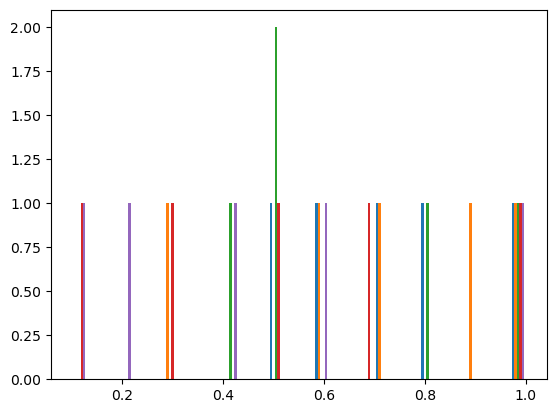

In [688]:
hist(percent_match, bins=30)
plt.show()

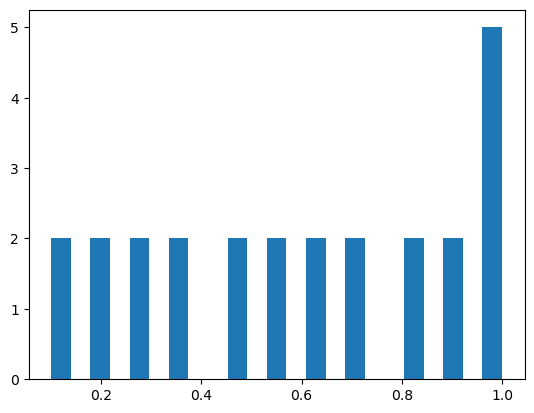

array([[1.  , 0.1 , 0.19, 0.28, 0.37],
       [0.1 , 1.  , 0.46, 0.54, 0.63],
       [0.19, 0.46, 1.  , 0.72, 0.81],
       [0.28, 0.54, 0.72, 1.  , 0.9 ],
       [0.37, 0.63, 0.81, 0.9 , 1.  ]])

In [287]:
hist(overlap_matrix.flatten(), bins = 23)   
plt.show()
overlap_matrix

In [275]:
p = generate_pattern(100,  perc_active = 0.2)